In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
import seaborn as sns
%matplotlib inline

In [ ]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
data = pd.read_csv('realDonaldTrump_tweets.csv')

In [ ]:
data['count'] = 1

In [ ]:
count_words = lambda x: len(x.split())

In [ ]:
character_count = lambda x: len(x)

In [ ]:
data['word_count'] = data['text'].apply(count_words)

In [ ]:
data['character_count'] = data['text'].apply(character_count)

In [ ]:
tokenize = lambda x: nltk.word_tokenize(x.decode('utf-8'))

In [ ]:
data['tokens'] = data['text'].apply(tokenize)

In [42]:
sentence_count = lambda x: len(nltk.sent_tokenize(x.decode('utf-8')))

In [43]:
data['sentence_count'] = data['text'].apply(sentence_count)

In [158]:
data.set_index(['created_at'], drop=True, inplace=True)

In [167]:
#data.groupby(pd.TimeGrouper(freq='30Min'))
#data.groupby(['created_at'])['count'].sum()
xx = data.groupby(pd.TimeGrouper(freq='10Min'))['count', 'character_count'].sum()

In [ ]:
pd.to_datetime(t, format= "%H:%M:%S") 

In [179]:
grp = xx.groupby(by=[xx.index.map(lambda x : (x.hour, x.minute))]).sum()

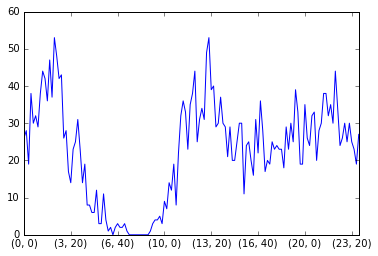

In [189]:
#grp.hist()
#grp.sort_values('count', ascending=False)
grp = grp.fillna(0)
grp['count'].plot()

In [18]:
data['created_at'] = pd.to_datetime(data['created_at'])

In [19]:
data['created_at'].dtype

dtype('<M8[ns]')

In [106]:
stop_words = list(set(stopwords.words('english')))

In [51]:
FreqDist(nltk.word_tokenize("My statement as to what's happening in Sweden"))

Counter({"'s": 1,
         'My': 1,
         'Sweden': 1,
         'as': 1,
         'happening': 1,
         'in': 1,
         'statement': 1,
         'to': 1,
         'what': 1})

In [53]:
tokens = data['tokens'].values

In [59]:
words = sum(tokens, [])

In [60]:
lowercase_words = [i.lower() for i in words]

In [197]:
junkish = ['.', ':', '!', "'", '@', 'https', '#', '"', ',', '``', "''", '-', ';', '&', 'amp', "n't", "'s", '?', 'rt',
          '(',')', '%', '...', '--', 'co', 'clinton', 'realdonaldtrump','trump2016']

In [198]:
filtered_words = [word for word in lowercase_words if word not in junkish+stop_words]

In [199]:
fdist = FreqDist(filtered_words)

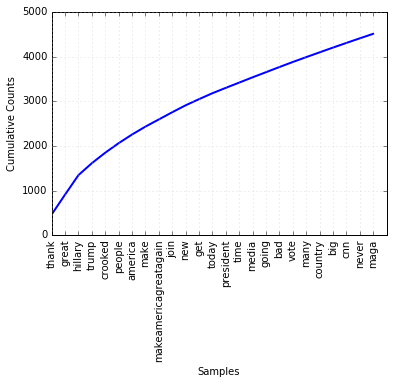

In [200]:
fdist.plot(25, cumulative=True)

In [201]:
fdist.most_common(100)

[(u'thank', 465),
 (u'great', 445),
 (u'hillary', 436),
 (u'trump', 267),
 (u'crooked', 235),
 (u'people', 213),
 (u'america', 194),
 (u'make', 177),
 (u'makeamericagreatagain', 161),
 (u'join', 161),
 (u'new', 155),
 (u'get', 138),
 (u'today', 133),
 (u'president', 120),
 (u'time', 118),
 (u'media', 118),
 (u'going', 115),
 (u'bad', 115),
 (u'vote', 113),
 (u'many', 109),
 (u'country', 107),
 (u'big', 107),
 (u'cnn', 104),
 (u'never', 103),
 (u'maga', 101),
 (u'would', 99),
 (u'jobs', 98),
 (u'back', 98),
 (u'one', 91),
 (u'tonight', 91),
 (u'obama', 88),
 (u'said', 86),
 (u'like', 86),
 (u'tomorrow', 83),
 (u'debate', 80),
 (u'watch', 79),
 (u'draintheswamp', 77),
 (u'americafirst', 77),
 (u'win', 77),
 (u'us', 75),
 (u'enjoy', 75),
 (u'speech', 73),
 (u'\u2026', 73),
 (u'bernie', 71),
 (u'last', 71),
 (u'see', 70),
 (u'u.s.', 70),
 (u'support', 69),
 (u'much', 67),
 (u'nytimes', 67),
 (u'ohio', 66),
 (u'good', 65),
 (u'news', 65),
 (u'job', 65),
 (u'want', 64),
 (u'american', 64),
 

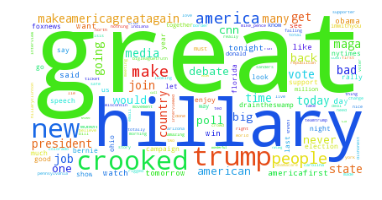

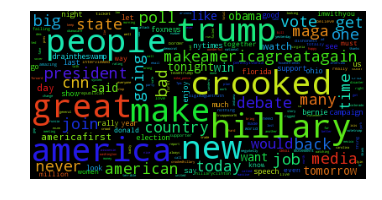

In [212]:
from wordcloud import WordCloud

text = '\t'.join(filtered_words)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=['co', 'thank'], background_color='white', max_words=2000).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40, stopwords=['co', 'thank']).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()